In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print(filepath)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sb 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import StratifiedShuffleSplit 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

/kaggle/input/california-housing-prices/housing.csv


### Reading and Exploring the Dataset

In [ ]:
housing_data = pd.read_csv(filepath)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_data.ocean_proximity.value_counts(dropna=False) 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing_data.ocean_proximity.replace(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],[float(a) for a in [1.0,2.0,3.0,4.0,5.0]], inplace = True)

In [ ]:
med = housing_data.total_bedrooms.median()
housing_data.total_bedrooms.fillna(med, inplace = True)

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [ ]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.908769
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.004549
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


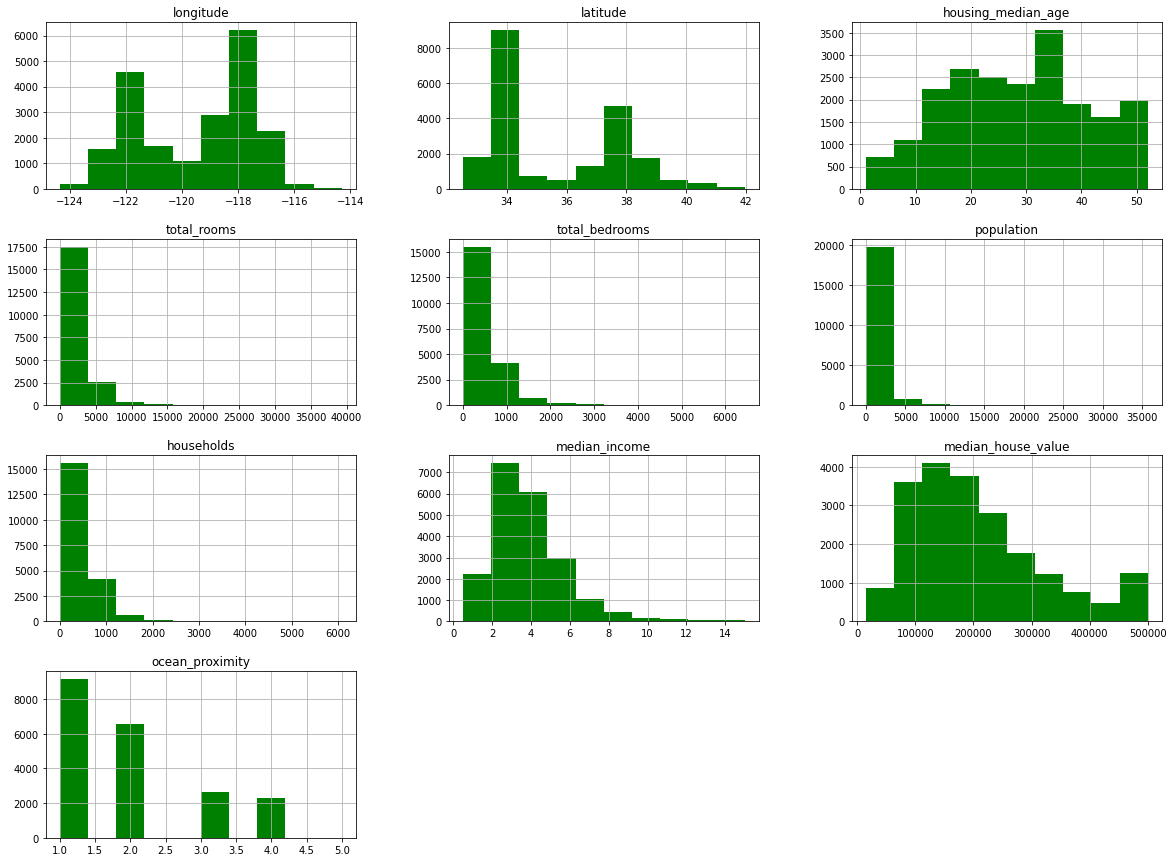

In [ ]:
housing_data.hist(figsize=(20,15), color = 'green', bins = 10)
plt.show()

In [ ]:
#median income seems like the place to begin working with as people buy homes based 
#on how much money htey have , so the amount that they earn should be an imp factor 
#so, let's classify based on that 

# dividing the income category to limit the number income category
housing_data['income_cat'] = np.ceil(housing_data['median_income'] / 1.5)
# putting everything above 5th category as 5th category
housing_data['income_cat'].where(housing_data['income_cat'] < 5, other=5.0, inplace=True)

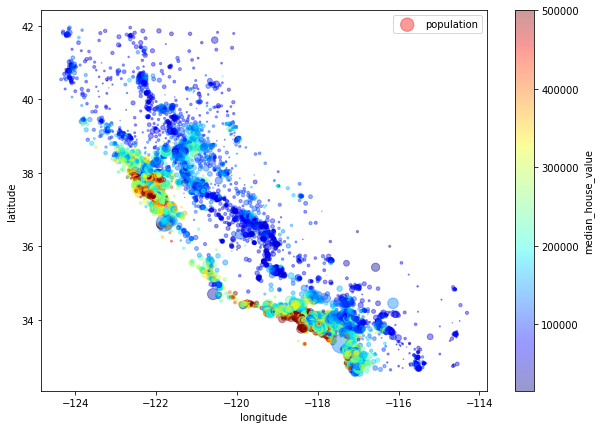

In [ ]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing_data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

<AxesSubplot:>

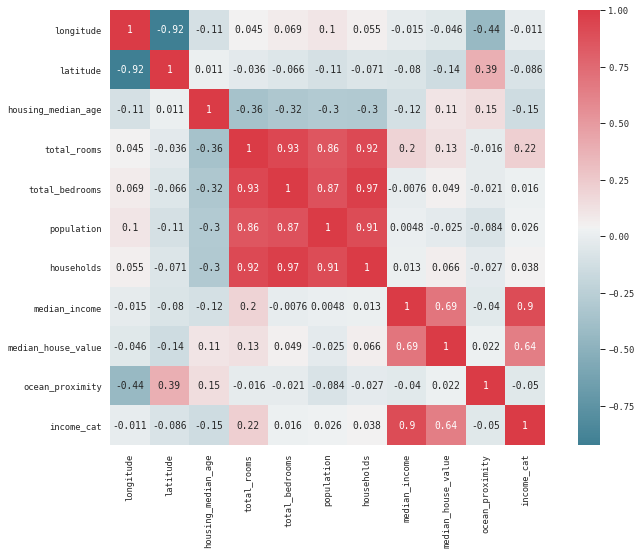

In [ ]:
sb.set(context="paper",font="monospace")
housing_corr_matrix = housing_data.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sb.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sb.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True )

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

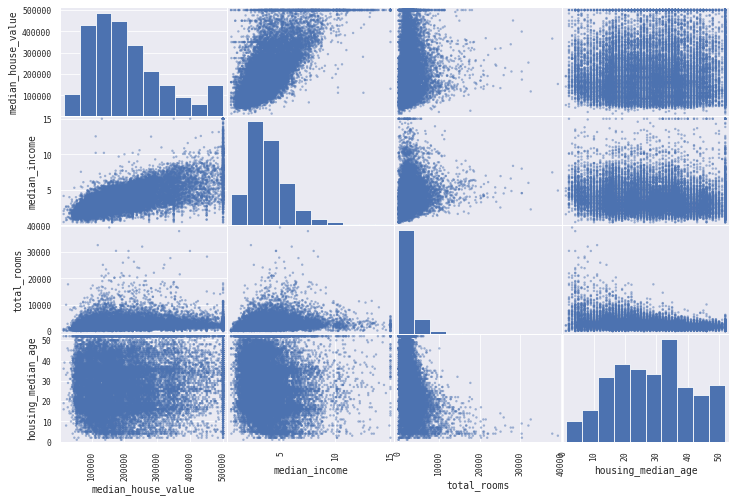

In [ ]:
# other approach it to use the scatter plot in a A vs B fashion
# problem with this is that (for N features, there will be N^2 plots)

imp_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

from pandas.plotting import scatter_matrix

scatter_matrix(housing_data[imp_attributes], figsize=(12, 8))

**FOR RANDOM SPLITTING**
**Using test-train-split**


In [ ]:
cols = list(housing_data.columns)
cols.remove('median_house_value')

In [ ]:
for col in cols : 
    s = housing_data[col].max()
    for i in range(len(housing_data[col]))  :
        housing_data[col][i] = housing_data[col][i]/s

In [ ]:
Y = housing_data.median_house_value
X = housing_data.drop('median_house_value', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

**USING STRATIFIED SAMPLING**

[why stratified?] : because the feature-space are less and also because its a mid-sized dataset & we don't want to miss out any class

In [ ]:
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

# for train_index, test_index in split.split(housing_data, housing_data['income_cat']) :
#     strat_train_set = housing_data.loc[train_index] 
#     strat_test_set = housing_data.loc[test_index]

In [ ]:
# housing_data["income_cat"].value_counts() / len(housing_data)

0.6    0.350581
0.4    0.318847
0.8    0.176308
1.0    0.114438
0.2    0.039826
Name: income_cat, dtype: float64

In [ ]:
# strat_train_set['income_cat'].value_counts() / len(strat_train_set)

0.6    0.350594
0.4    0.318859
0.8    0.176296
1.0    0.114402
0.2    0.039850
Name: income_cat, dtype: float64

In [ ]:
# strat_test_set['income_cat'].value_counts() / len(strat_test_set)

0.6    0.350533
0.4    0.318798
0.8    0.176357
1.0    0.114583
0.2    0.039729
Name: income_cat, dtype: float64

**as seen above the proportions are maintained in the test set using stratified sampling**

In [ ]:
# ##removing 'income_cat' as we dont need it anymore 

# for items in (strat_train_set, strat_test_set):
#     items.drop("income_cat", axis=1, inplace=True)

(0.0, 16.0, 0.0, 550000.0)

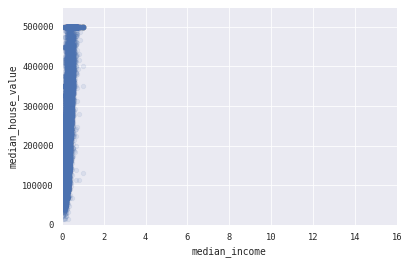

In [ ]:
# housing_data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
# plt.axis([0, 16, 0, 550000])

### FEATURE ENGINEERING 

In [ ]:
# housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
# housing_data["population_per_household"] = housing_data["population"]/housing_data["households"]
# housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]

### Making the model and testing accuracies 


In [ ]:
#Trying Linear Regression on random split 
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#predicting values 
y_pred = lin_reg.predict(x_test)

In [ ]:
#finding errors
print("Model Accuracy: %.3f" % lin_reg.score(x_test, y_test))

Model Accuracy: 0.621


In [ ]:
#using Gradient boosting Regression on random split 

gbr_params = {'n_estimators': 2000,
          'max_depth': 7,
          'min_samples_split': 10,
          'learning_rate': 0.03,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=7, min_samples_split=10,
                          n_estimators=2000)

In [ ]:
print("Model Accuracy: %.3f" % gbr.score(x_test, y_test))

Model Accuracy: 0.833
